In [195]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

In [196]:
# Kerasの必要なコンポーネントをインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [197]:
# Scikit-learn(Sklearn)のインポート
from sklearn.datasets import fetch_mldata

In [198]:
# データを高速かつ効率的に使えるPandasをインポート
import pandas as pd
# 数値計算を効率的に行うNumpyをインポート
import numpy as np

In [199]:
# グラフが簡単に描写できるMatplotlibをインポート
import matplotlib
import matplotlib.pyplot as plt

In [200]:
# Scikit-learn経由でMNISTのオリジナルデータをダウロード
mnist = fetch_mldata('MNIST original')

In [201]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [202]:
# 説明変数と目的変数に切り分けます
X, y = mnist['data'], mnist['target']

In [203]:
# numpyのshape関数を使ってXのサイズを確認
X.shape, y.shape

((70000, 784), (70000,))

In [204]:
# Xの53238番目のデータをtest_numberへ切り出す
test_number = X[33333]
# reshape関数を使って784を28x28へ変換する
test_number_image = test_number.reshape(28,28)

In [205]:
# pandasのカラム表示の設定を変更
pd.options.display.max_columns = 28

In [206]:
# Numpy配列からPandasのデータフレームへ変換
number_matrix = pd.DataFrame(test_number_image)
# number_matrixの表示
number_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,11,130,87,43,43,43,43,43,123,201,253,209,18,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,64,252,253,252,252,252,252,253,252,252,252,252,71,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,64,252,253,252,252,252,252,253,252,224,126,82,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,21,225,253,252,194,189,189,172,84,7,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,211,253,252,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


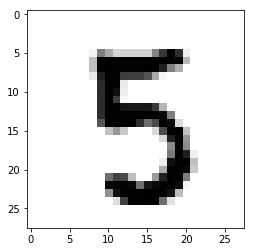

In [207]:
# imshowを使って表示test_number_image（Numpy配列）を画像で表示
%matplotlib inline 
plt.imshow(test_number_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [208]:
# 53238番目のYの値を出力
y[33333]

5.0

In [209]:
# 訓練データとテストデータを切り分ける
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_test_backup = y_test
# 両方のサイズを確認
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [210]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [211]:
# 28x28x1のサイズへ変換しましょう
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [212]:
X_train.shape

(60000, 28, 28, 1)

In [213]:
# データタイプをfloat32へ変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [214]:
# 正規化（ピクセルの最大値は255）
X_train /= 255
X_test /= 255

In [215]:
y_test

array([0., 0., 0., ..., 9., 9., 9.])

In [216]:
y_test.shape

(10000,)

In [217]:
# ターゲットとなるyを変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# y_testの1を表示
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [218]:
y_test.shape

(10000, 10)

In [219]:
# モデルの宣言
model = Sequential()

In [220]:
# 先に作成したmodelへレイヤーを追加
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [221]:
# Learnig Processの設定
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [222]:
# 注意 - 10〜15分程度かかります
# モデルの訓練（エポック １０）
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.5089 - acc: 0.8577
Epoch 2/10
60000/60000 [==============================] - 38s 633us/step - loss: 0.2522 - acc: 0.9251
Epoch 3/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.1952 - acc: 0.9423
Epoch 4/10
60000/60000 [==============================] - 38s 630us/step - loss: 0.1617 - acc: 0.9519
Epoch 5/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.1370 - acc: 0.9582
Epoch 6/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.1196 - acc: 0.9631
Epoch 7/10
60000/60000 [==============================] - 38s 634us/step - loss: 0.1062 - acc: 0.9681
Epoch 8/10
60000/60000 [==============================] - 40s 673us/step - loss: 0.0964 - acc: 0.9702
Epoch 9/10
60000/60000 [==============================] - 40s 674us/step - loss: 0.0891 - acc: 0.9731
Epoch 10/10
60000/60000 [==============================] - 41s 687us/step - loss: 

In [223]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

10000/10000 [==============================] - 2s 157us/step
[0.07338779253959656, 0.977]


In [228]:
# X_testを使って予測を行う
predictions = model.predict_classes(X_test)

In [235]:
X_test.shape

(10000, 28, 28, 1)

In [238]:
predictions.shape

(10000,)

In [229]:
x = list(predictions)
y = list(y_test_backup)

In [234]:
results = pd.DataFrame({'Actual': y, 'Predictions': x})
results[1:100]

,Actual,Predictions
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0
10,0.0,0
